In [45]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [46]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

# 1. Dataset Statistics

In [47]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [48]:
scipy.stats.describe(y)

DescribeResult(nobs=3065, minmax=(0, 1), mean=0.39738988580750406, variance=0.23954932085067235, skewness=0.41936632478193103, kurtosis=-1.824131885638896)

## 1a) Distributions of all features (unnormalized)

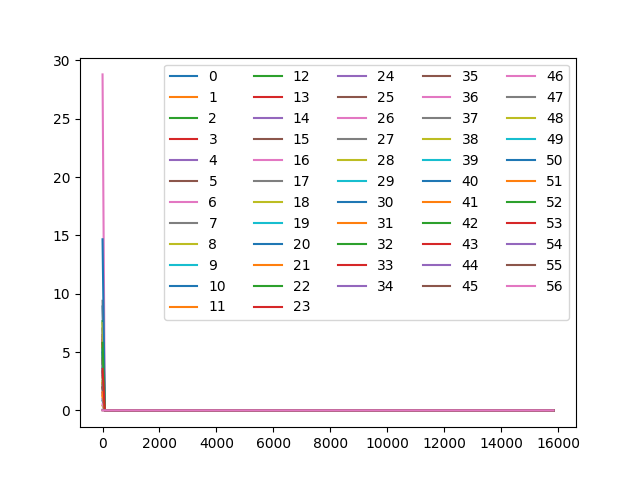

In [49]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

### Statistical Summary of Feature Distributions (unnormalized)

    Feature        Mean         Std  Min        Max   Skewness     Kurtosis
0         0    0.110819    0.327199  0.0      4.540   5.922579    51.715584
1         1    0.228486    1.373610  0.0     14.280   9.555549    93.890162
2         2    0.274153    0.483984  0.0      5.100   2.941108    13.188399
3         3    0.062969    1.334555  0.0     42.810  27.150353   785.401638
4         4    0.317788    0.663462  0.0      9.090   4.220003    28.694876
5         5    0.095755    0.260571  0.0      3.570   4.554904    31.205770
6         6    0.113546    0.373897  0.0      7.270   6.214545    66.531508
7         7    0.107217    0.414663  0.0     11.110  10.636044   198.680109
8         8    0.088923    0.264011  0.0      3.330   4.447954    28.295301
9         9    0.241719    0.685308  0.0     18.180   9.633688   185.406078
10       10    0.058131    0.189258  0.0      2.000   5.160156    34.488006
11       11    0.537432    0.871160  0.0      9.670   3.127974    15.187125
12       12 

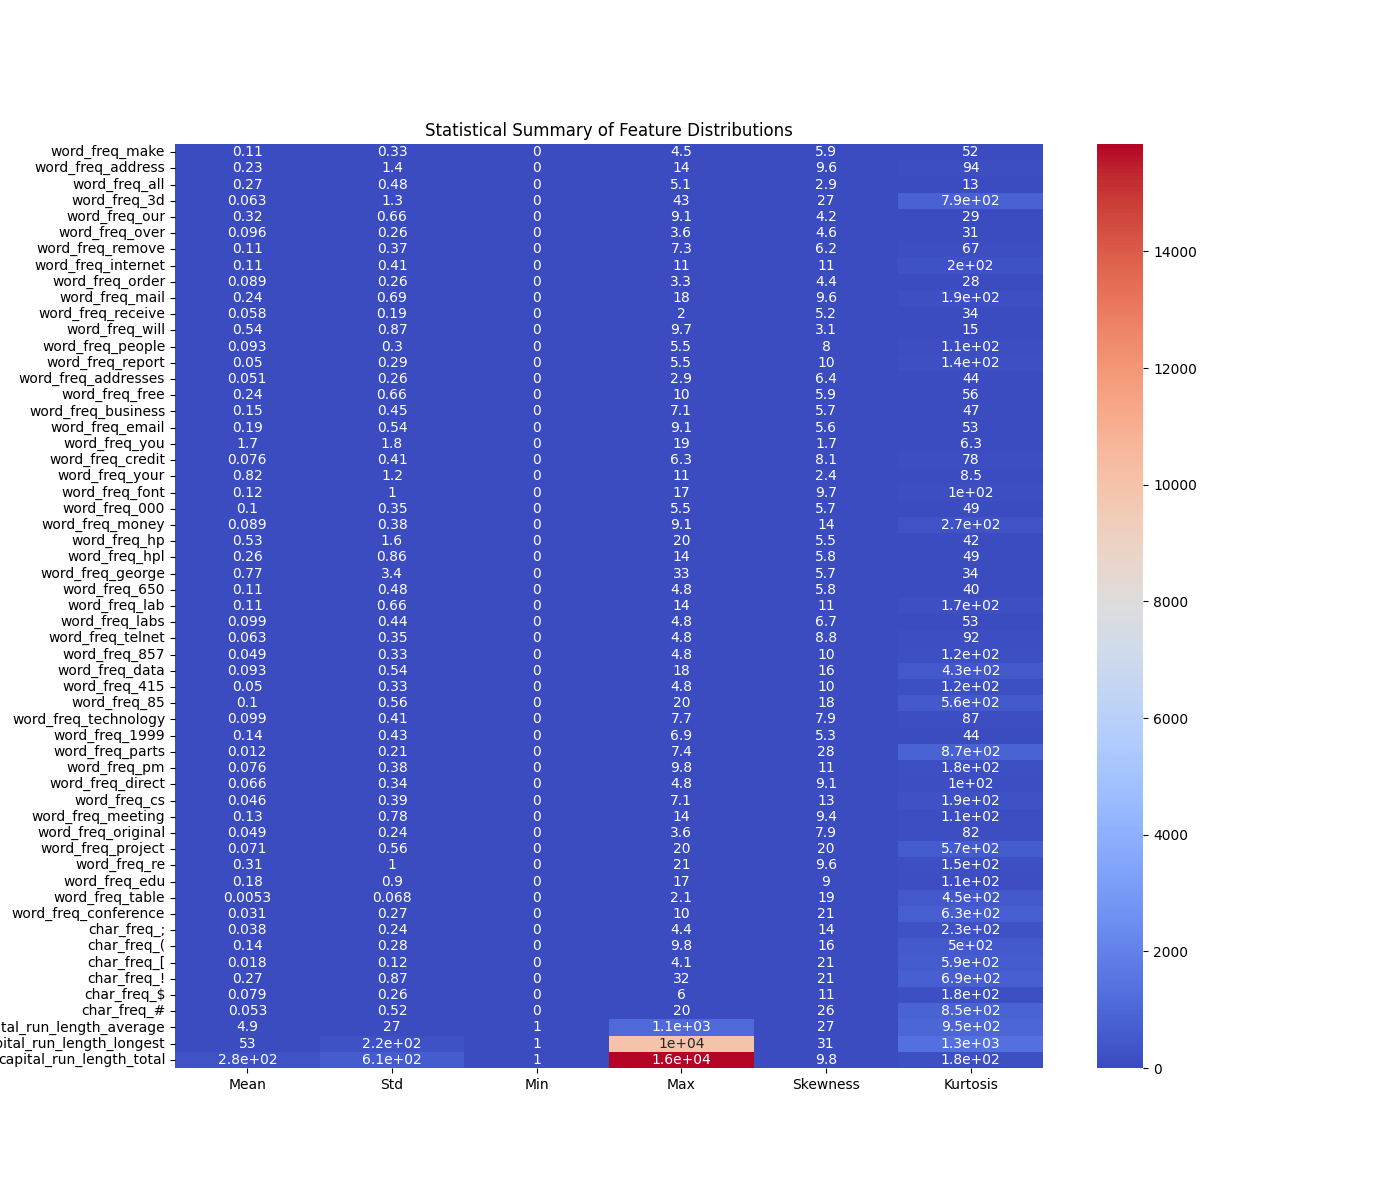

In [50]:
# this plots is not really helpful; go now explore further
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Collect the statistical summary for each feature
data = []
for j in range(D):
    feature_values = X[:, j]
    mean = np.mean(feature_values)
    std_dev = np.std(feature_values)
    min_val = np.min(feature_values)
    max_val = np.max(feature_values)
    skewness = scipy.stats.skew(feature_values)
    kurtosis = scipy.stats.kurtosis(feature_values)
    
    data.append([j, mean, std_dev, min_val, max_val, skewness, kurtosis])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature', 'Mean', 'Std', 'Min', 'Max', 'Skewness', 'Kurtosis'])

# Display the DataFrame
print(df)

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.iloc[:, 1:], annot=True, cmap='coolwarm', xticklabels=df.columns[1:], yticklabels=features)
plt.title('Statistical Summary of Feature Distributions')
plt.show()

### Correlation Matrix of Features

Highly Correlated Feature Pairs (Threshold > 0.7):
word_freq_telnet and word_freq_labs: 0.74
word_freq_857 and word_freq_telnet: 0.82
word_freq_415 and word_freq_telnet: 0.82
word_freq_415 and word_freq_857: 1.00
word_freq_technology and word_freq_telnet: 0.77
word_freq_direct and word_freq_telnet: 0.79
word_freq_direct and word_freq_857: 0.84
word_freq_direct and word_freq_415: 0.84


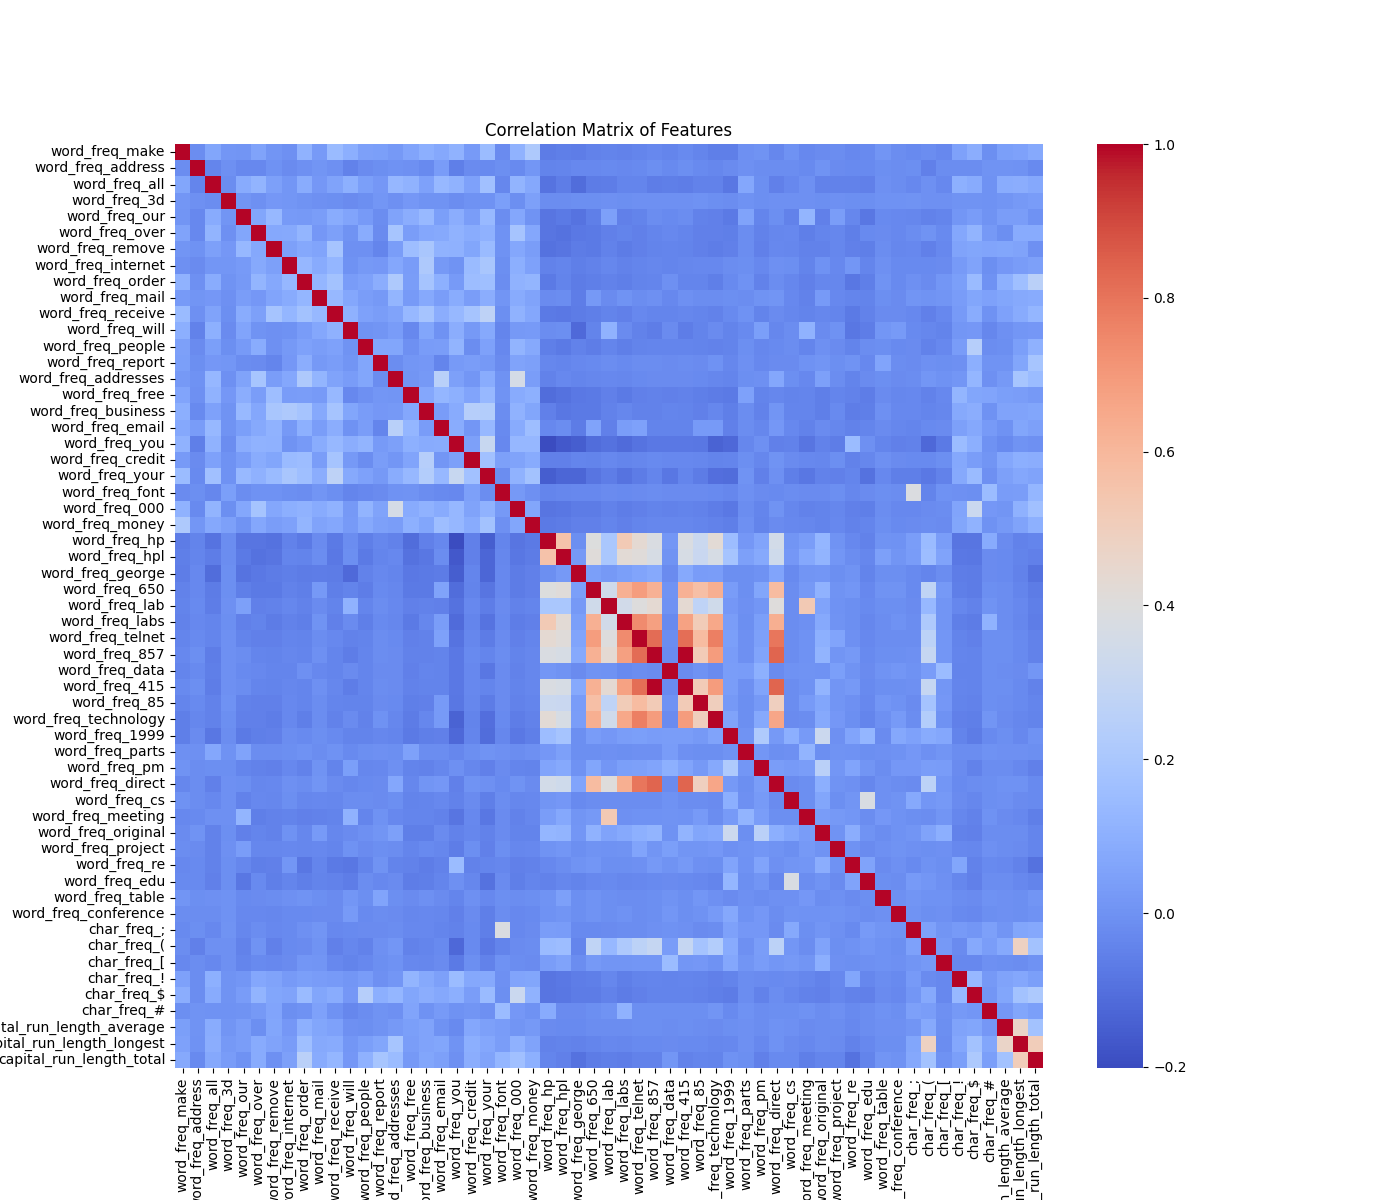

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the feature values
df_features = pd.DataFrame(X, columns=features)

# Compute the correlation matrix
corr_matrix = df_features.corr()

# Find highly correlated feature pairs
threshold = 0.7
highly_correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Output the highly correlated feature pairs
print("Highly Correlated Feature Pairs (Threshold > 0.7):")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Plot the heatmap for the correlation matrix without annotations
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', xticklabels=features, yticklabels=features)
plt.title('Correlation Matrix of Features')
plt.show()

## 1b) Feature Normalization

In [52]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
# Compute mean and standard deviation of training data
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Calculate z-scores for training and test sets based on training statistics
Xz = (X - mean_X) / std_X
Xtestz = (Xtest - mean_X) / std_X

In [53]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
print("Mean of Xz (should be all 0):")
print(np.mean(Xz, axis=0))

print("\nVariance of Xz (should be all 1):")
print(np.var(Xz, axis=0))

print("\nMean of Xtestz:")
print(np.mean(Xtestz, axis=0))

print("\nVariance of Xtestz:")
print(np.var(Xtestz, axis=0))

print("\nSum of Xz^3 (should be: 1925261.15):")
print(np.sum(Xz ** 3))

Mean of Xz (should be all 0):
[ 1.85459768e-17  9.27298839e-18 -5.56379304e-17 -9.27298839e-18
  5.56379304e-17  3.70919536e-17  0.00000000e+00 -7.41839072e-17
  5.56379304e-17  0.00000000e+00 -1.85459768e-17 -2.43415945e-17
 -4.63649420e-17  1.85459768e-17  1.85459768e-17  3.70919536e-17
 -3.70919536e-17 -9.27298839e-17 -1.66913791e-16  9.27298839e-18
  1.85459768e-17  9.27298839e-18 -5.56379304e-17 -1.85459768e-17
 -6.49109188e-17 -3.70919536e-17 -1.85459768e-17  1.85459768e-17
 -2.78189652e-17  4.63649420e-17 -1.85459768e-17  5.56379304e-17
  0.00000000e+00 -1.85459768e-17  3.70919536e-17  1.85459768e-17
 -9.27298839e-18  4.63649420e-18  1.85459768e-17  9.27298839e-18
  2.31824710e-17 -2.78189652e-17 -9.27298839e-18  4.63649420e-18
 -9.27298839e-18 -9.27298839e-18  1.39094826e-17 -2.78189652e-17
 -3.70919536e-17 -6.49109188e-17  4.63649420e-18  3.70919536e-17
 -3.70919536e-17  9.27298839e-18 -9.27298839e-18  9.27298839e-18
 -7.41839072e-17]

Variance of Xz (should be all 1):
[1. 1. 

## 1c) Distributions of all features (normalized)

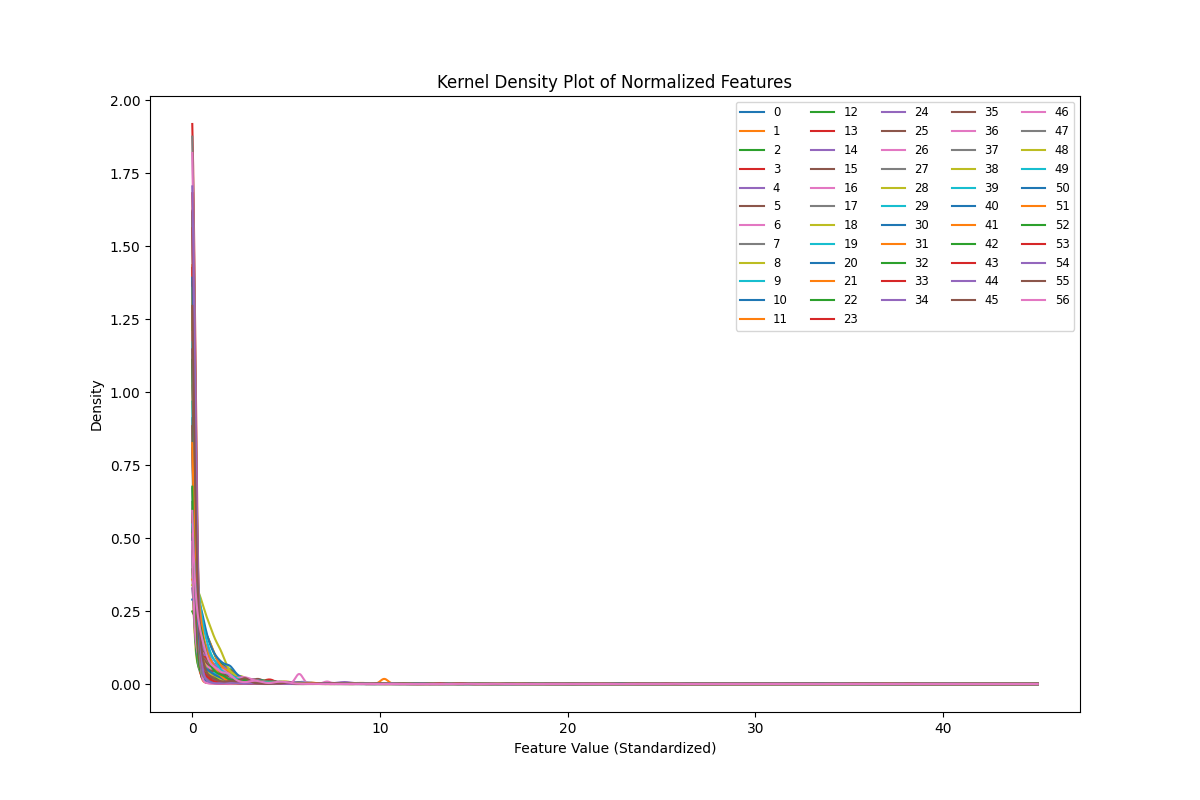

In [54]:
# Explore the normalized data
import matplotlib.pyplot as plt
import scipy.stats

# Set up the plot
plt.figure(figsize=(12, 8))
densities_z = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(Xz.shape[1])]
xs = np.linspace(0, np.max(Xz), 1000)

# Plot each feature's density
for j in range(Xz.shape[1]):
    plt.plot(xs, densities_z[j](xs), label=j)

plt.legend(ncol=5, fontsize='small')
plt.title('Kernel Density Plot of Normalized Features')
plt.xlabel('Feature Value (Standardized)')
plt.ylabel('Density')
plt.show()


### Statistical Summary of Feature Distributions (normalized)

    Feature          Mean  Std       Min        Max   Skewness     Kurtosis
0         0  1.854598e-17  1.0 -0.338690  13.536658   5.922579    51.715584
1         1  9.272988e-18  1.0 -0.166340  10.229624   9.555549    93.890162
2         2 -5.563793e-17  1.0 -0.566451   9.971077   2.941108    13.188399
3         3 -9.272988e-18  1.0 -0.047184  32.030935  27.150353   785.401638
4         4  5.563793e-17  1.0 -0.478984  13.221872   4.220003    28.694876
5         5  3.709195e-17  1.0 -0.367483  13.333204   4.554904    31.205770
6         6  0.000000e+00  1.0 -0.303684  19.140184   6.214545    66.531508
7         7 -7.418391e-17  1.0 -0.258564  26.534285  10.636044   198.680109
8         8  5.563793e-17  1.0 -0.336816  12.276277   4.447954    28.295301
9         9  0.000000e+00  1.0 -0.352716  26.175503   9.633688   185.406078
10       10 -1.854598e-17  1.0 -0.307150  10.260444   5.160156    34.488006
11       11 -2.434159e-17  1.0 -0.616916  10.483225   3.127974    15.187125
12       12 

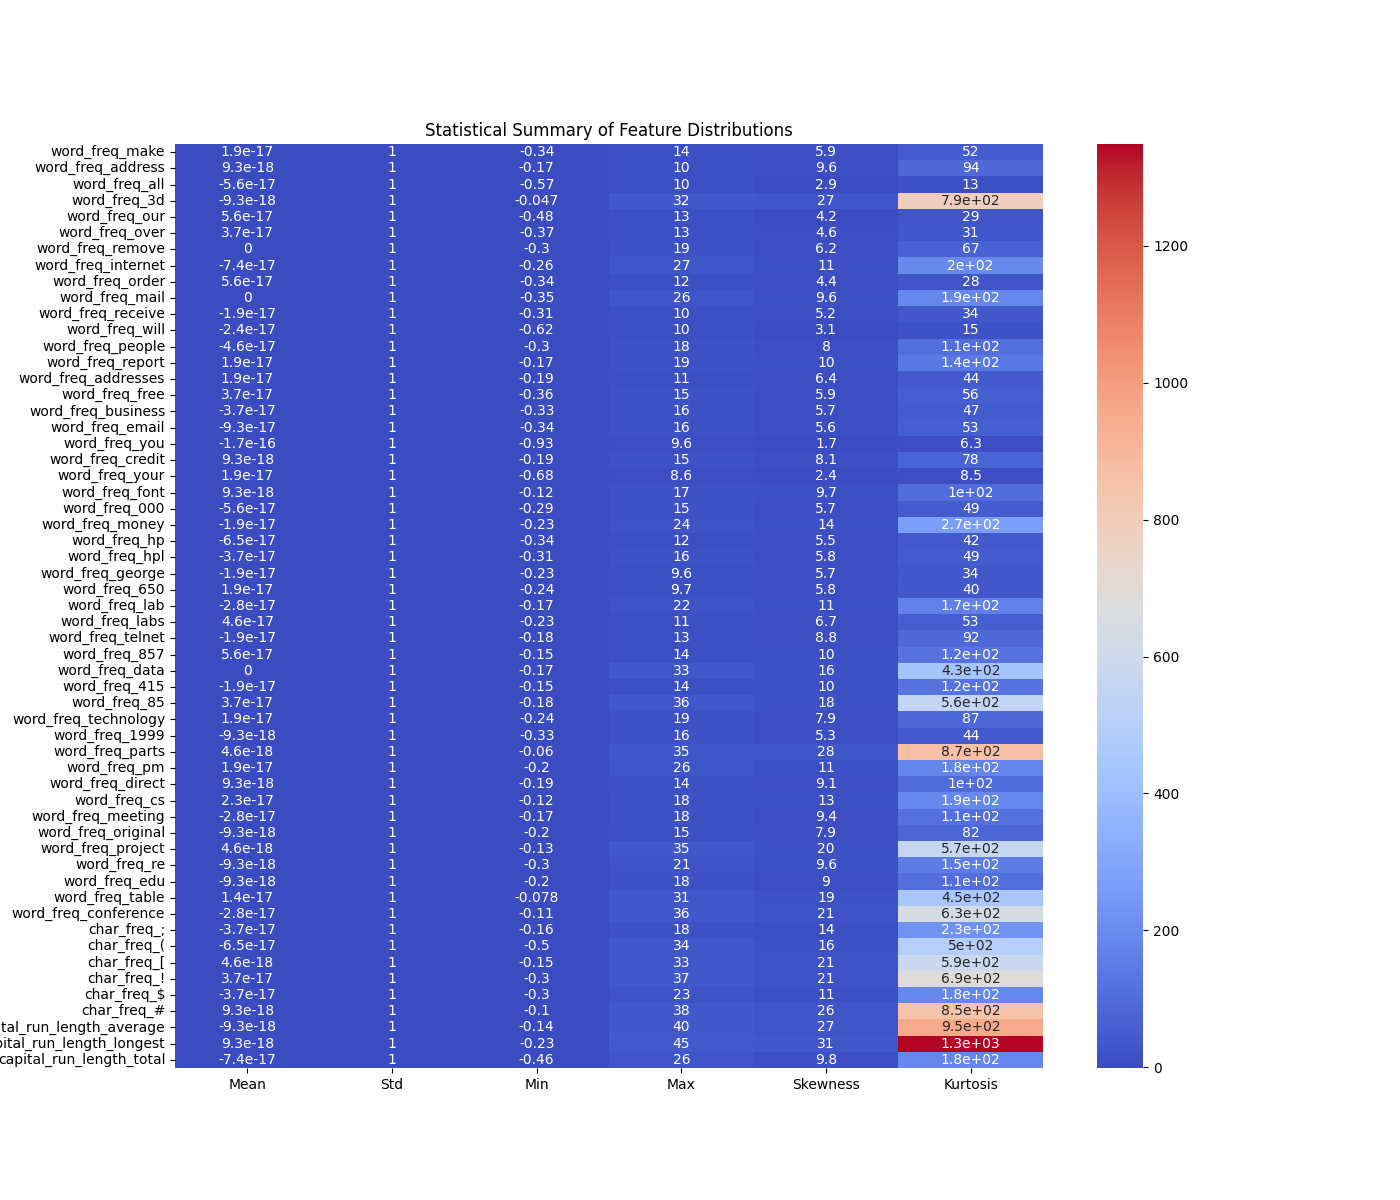

In [55]:
# this plots is not really helpful; go now explore further
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Collect the statistical summary for each feature
data = []
for j in range(D):
    feature_values = Xz[:, j]
    mean = np.mean(feature_values)
    std_dev = np.std(feature_values)
    min_val = np.min(feature_values)
    max_val = np.max(feature_values)
    skewness = scipy.stats.skew(feature_values)
    kurtosis = scipy.stats.kurtosis(feature_values)
    
    data.append([j, mean, std_dev, min_val, max_val, skewness, kurtosis])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature', 'Mean', 'Std', 'Min', 'Max', 'Skewness', 'Kurtosis'])

# Display the DataFrame
print(df)

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.iloc[:, 1:], annot=True, cmap='coolwarm', xticklabels=df.columns[1:], yticklabels=features)
plt.title('Statistical Summary of Feature Distributions')
plt.show()

# 2. Maximum Likelihood Estimation

## Helper functions

In [56]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [57]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    return 1 / (1 + np.exp(-x))

In [58]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[0.5, array([0.26894142, 0.5       , 0.73105858])]

In [59]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    return np.log(sigma(x))

In [60]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[-0.6931471805599453, array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [61]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    # Linear combination of inputs
    Xw = X @ w
    log_likelihood = np.sum(y * logsigma(Xw) + (1 - y) * logsigma(-Xw))
    return log_likelihood

In [62]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

-47066.641667825774

In [65]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    # Compute the predicted probabilities using the sigmoid function
    preds = sigma(X @ w)
    
    # Calculate the error term (y - sigma(X @ w))
    e = y - preds
    
    # Calculate the gradient as (y - sigma(X @ w)T @ X
    gradient = e.T @ X
    
    return gradient

In [66]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [70]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [71]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        # Compute the negative log-likelihood (since we want to minimize it)
        return -l(y, X, w)

    def update(w, eps):
        # Compute the gradient
        gradient = dl(y, X, w)
        # Update
        return w + eps * gradient

    return (objective, update)

In [87]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[47066.641667825774,
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+00,  4.62953

In [88]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

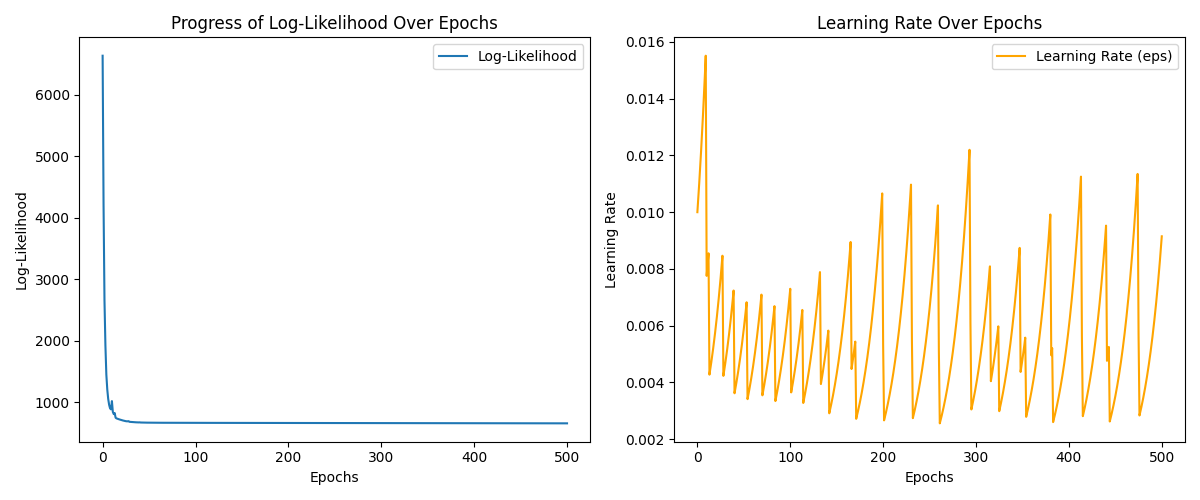

In [119]:
# look at how gradient descent made progess
import matplotlib.pyplot as plt

# Plot the log-likelihood over epochs
plt.figure(figsize=(12, 5))

# Plot log-likelihood values
plt.subplot(1, 2, 1)
plt.plot(vz_gd, label="Log-Likelihood")
plt.xlabel("Epochs")
plt.ylabel("Log-Likelihood")
plt.title("Progress of Log-Likelihood Over Epochs")
plt.legend()

# Plot learning rate (eps) over epochs
plt.subplot(1, 2, 2)
plt.plot(ez_gd, label="Learning Rate (eps)", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


## 2d Stochastic gradient descent

In [89]:
import numpy as np

def sgdepoch(y, X, w, eps):
    # Shuffle the data points (without replacement)
    indices = np.random.permutation(len(y))
    
    # Perform a gradient update for each data point
    for i in indices:
        xi = X[i]       
        yi = y[i]       
        pi = sigma(xi @ w)  
        ei = yi - pi
        gradient = ei * xi 
        w = w + eps * gradient
    
    return w


In [90]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [91]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [92]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[40.86497304569509,
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.433624

In [93]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   958.654, eps=0.010500000
Epoch   2: f=   786.651, eps=0.011025000
Epoch   3: f=   738.739, eps=0.011576250
Epoch   4: f=   718.166, eps=0.012155063
Epoch   5: f=   709.413, eps=0.012762816
Epoch   6: f=   696.048, eps=0.013400956
Epoch   7: f=   701.674, eps=0.006700478
Epoch   8: f=   686.406, eps=0.007035502
Epoch   9: f=   683.692, eps=0.007387277
Epoch  10: f=   684.500, eps=0.003693639
Epoch  11: f=   679.969, eps=0.003878321
Epoch  12: f=   679.230, eps=0.004072237
Epoch  13: f=   678.181, eps=0.004275848
Epoch  14: f=   677.570, eps=0.004489641
Epoch  15: f=   676.763, eps=0.004714123
Epoch  16: f=   675.966, eps=0.004949829
Epoch  17: f=   676.625, eps=0.002474914
Epoch  18: f=   675.185, eps=0.002598660
Epoch  19: f=   674.531, eps=0.002728593
Epoch  20: f=   674.095, eps=0.002865023
Epoch  21: f=   673.692, eps=0.003008274
Epoch  22: f=   673.359, eps=0.003158688
Epoch  23: f=   673.075, eps=0.003316622
Epoch  24: f=   

## 2e Compare GD and SGD

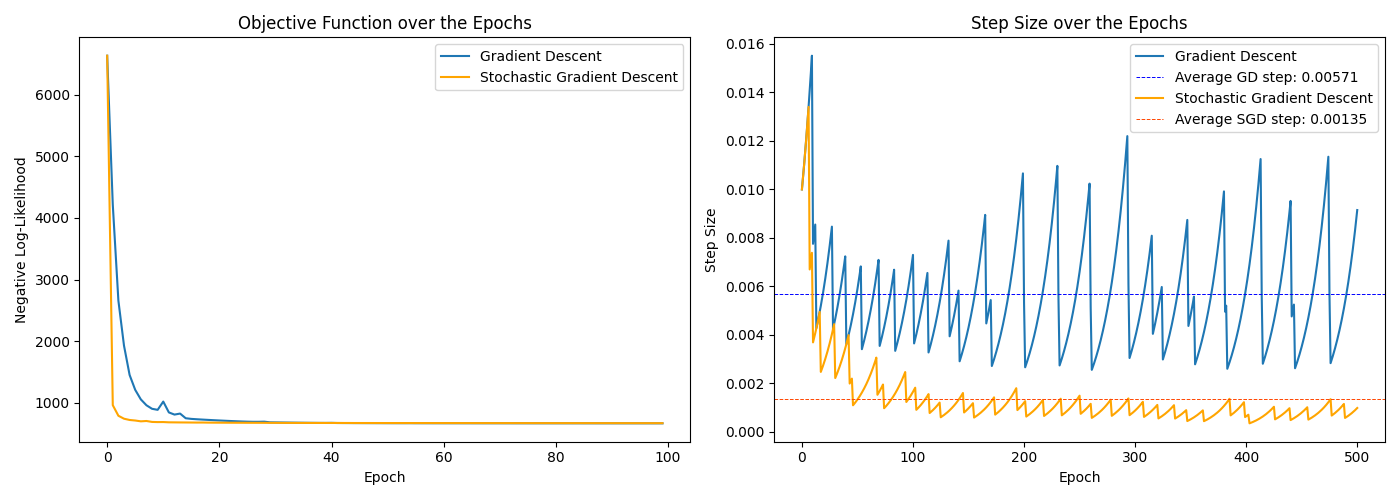

Gradient Descent (GD) Summary:
  Initial Log-likelihood: 6636.2084
  Final Log-likelihood: 655.4135
  Min Log-likelihood: 655.4135

Stochastic Gradient Descent (SGD) Summary:
  Initial Log-likelihood: 6636.2084
  Final Log-likelihood: 663.3023
  Min Log-likelihood: 663.3023


In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Define the figure with two subplots side-by-side
plt.figure(figsize=(14, 5))

# 1st plot: Objective function over the epochs
plt.subplot(1, 2, 1)
plt.plot(vz_gd[0:100], label="Gradient Descent")
plt.plot(vz_sgd[0:100], label="Stochastic Gradient Descent", color='orange')
plt.title("Objective Function over the Epochs")
plt.xlabel("Epoch")
plt.ylabel("Negative Log-Likelihood")
plt.legend()

# 2nd plot: Step size over the epochs
plt.subplot(1, 2, 2)
plt.plot(ez_gd, label="Gradient Descent")
plt.axhline(np.mean(ez_gd), color='blue', linestyle='--', lw=0.7, label=f'Average GD step: {np.mean(ez_gd):.5f}')
plt.plot(ez_sgd, label="Stochastic Gradient Descent", color='orange')
plt.axhline(np.mean(ez_sgd), color='orangered', linestyle='--', lw=0.7, label=f'Average SGD step: {np.mean(ez_sgd):.5f}')
plt.title("Step Size over the Epochs")
plt.xlabel("Epoch")
plt.ylabel("Step Size")
plt.legend()

# Adjust layout for a tidy appearance
plt.tight_layout()
plt.show()

# Print summary statistics for GD and SGD log-likelihoods
print("Gradient Descent (GD) Summary:")
print(f"  Initial Log-likelihood: {vz_gd[0]:.4f}")
print(f"  Final Log-likelihood: {vz_gd[-1]:.4f}")
print(f"  Min Log-likelihood: {min(vz_gd):.4f}")

print("\nStochastic Gradient Descent (SGD) Summary:")
print(f"  Initial Log-likelihood: {vz_sgd[0]:.4f}")
print(f"  Final Log-likelihood: {vz_sgd[-1]:.4f}")
print(f"  Min Log-likelihood: {min(vz_sgd):.4f}")


# 3 Prediction

In [95]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    return sigma(Xtest @ w)


def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    labels = (predict(Xtest, w) >= 0.5).astype(int)  # Convert boolean to int (0 or 1)
    
    return labels

### Confusuion matrices. GD vs SGD

[[887  54]
 [ 71 524]]
[[886  55]
 [ 72 523]]


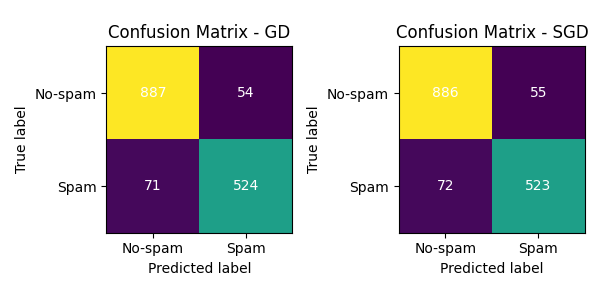

In [105]:
# Confusion matrix for the model trained with GD
yhat_gd = predict(Xtestz, wz_gd)
ypred_gd = classify(Xtestz, wz_gd)

confusion_matrix_gd = sklearn.metrics.confusion_matrix(ytest, ypred_gd)
print(confusion_matrix_gd)

# Confusion matrix for the model trained with GD
yhat_sgd = predict(Xtestz, wz_sgd)
ypred_sgd = classify(Xtestz, wz_sgd)

confusion_matrix_sgd = sklearn.metrics.confusion_matrix(ytest, ypred_sgd)
print(confusion_matrix_sgd)


# plot both confusion matrices one near another
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
# confustion matrix for the model trained with gradient descent
axes[0].imshow(confusion_matrix_gd, interpolation='nearest', cmap=plt.cm.viridis)
axes[0].set_title('Confusion Matrix - GD')
axes[0].set_ylabel('True label')
axes[0].set_xlabel('Predicted label')
ticks = np.arange(2)
axes[0].set_xticks(ticks)
axes[0].set_yticks(ticks)
axes[0].set_xticklabels(['No-spam', 'Spam'])
axes[0].set_yticklabels(['No-spam', 'Spam'])
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, confusion_matrix_gd[i, j], ha='center', va='center', color='white' if confusion_matrix_gd[i, j] > 50 else 'black')

# confustion matrix for the model trained with stohastic gradient descent
axes[1].imshow(confusion_matrix_sgd, interpolation='nearest', cmap=plt.cm.viridis)
axes[1].set_title('Confusion Matrix - SGD')
axes[1].set_ylabel('True label')
axes[1].set_xlabel('Predicted label')
axes[1].set_xticks(ticks)
axes[1].set_yticks(ticks)
axes[1].set_xticklabels(['No-spam', 'Spam'])
axes[1].set_yticklabels(['No-spam', 'Spam'])
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, confusion_matrix_sgd[i, j], ha='center', va='center', color='white' if confusion_matrix_sgd[i, j] > 50 else 'black')


plt.tight_layout()
plt.show()

### Classification Report. GD vs SGD

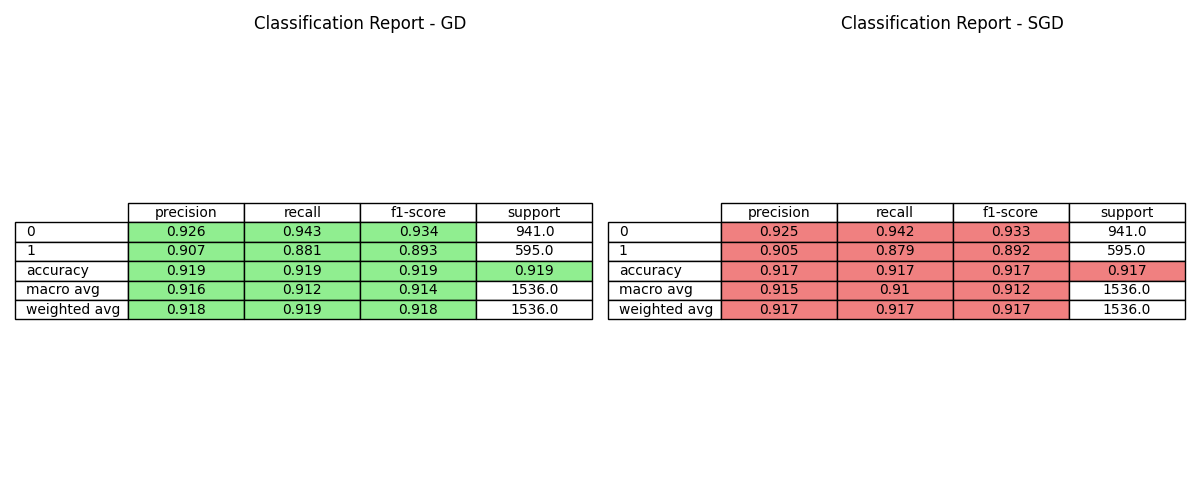

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics

# Generate classification reports for both models as dictionaries
report_gd = metrics.classification_report(ytest, ypred_gd, output_dict=True)
report_sgd = metrics.classification_report(ytest, ypred_sgd, output_dict=True)

# Convert the classification reports to DataFrames and round to 3 decimal places
report_gd_df = pd.DataFrame(report_gd).transpose().round(3)
report_sgd_df = pd.DataFrame(report_sgd).transpose().round(3)

# Set up colors for better, worse, and equal metrics
def highlight_diff(val_gd, val_sgd):
    if val_gd > val_sgd:
        return "background-color: lightgreen"  # GD better
    elif val_gd < val_sgd:
        return "background-color: lightcoral"  # SGD better
    else:
        return ""  # Equal

# Plot both classification reports side by side with conditional formatting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Visualization for the GD classification report with conditional formatting
axes[0].axis('off')  # Turn off the axis grid
table_gd = axes[0].table(
    cellText=report_gd_df.values,
    colLabels=report_gd_df.columns,
    rowLabels=report_gd_df.index,
    cellLoc='center',
    loc='center'
)
axes[0].set_title("Classification Report - GD")

# Visualization for the SGD classification report with conditional formatting
axes[1].axis('off')  # Turn off the axis grid
table_sgd = axes[1].table(
    cellText=report_sgd_df.values,
    colLabels=report_sgd_df.columns,
    rowLabels=report_sgd_df.index,
    cellLoc='center',
    loc='center'
)
axes[1].set_title("Classification Report - SGD")

# Apply highlighting based on comparison
for i, row_label in enumerate(report_gd_df.index):
    for j, col_label in enumerate(report_gd_df.columns):
        # Get GD and SGD values for comparison
        val_gd = report_gd_df.at[row_label, col_label]
        val_sgd = report_sgd_df.at[row_label, col_label]

        # Highlight GD table
        table_gd[(i+1, j)].set_facecolor("lightgreen" if val_gd > val_sgd else "lightcoral" if val_gd < val_sgd else "white")

        # Highlight SGD table
        table_sgd[(i+1, j)].set_facecolor("lightcoral" if val_gd > val_sgd else "lightgreen" if val_gd < val_sgd else "white")

plt.tight_layout()
plt.show()


### Precision-Recall Curve Comparison. GD vs SGD

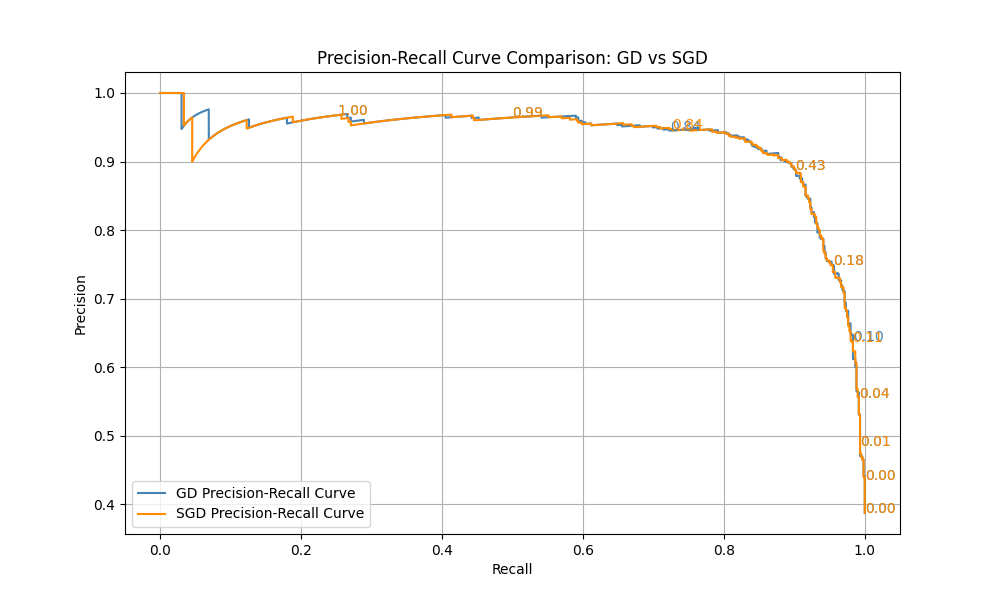

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# Calculate precision, recall, and thresholds for both models
precision_gd, recall_gd, thresholds_gd = metrics.precision_recall_curve(ytest, yhat_gd)
precision_sgd, recall_sgd, thresholds_sgd = metrics.precision_recall_curve(ytest, yhat_sgd)

# Plot precision-recall curves for both models
plt.figure(figsize=(10, 6))

# Plot for Gradient Descent (GD) with consistent color
plt.plot(recall_gd, precision_gd, label="GD Precision-Recall Curve", color="steelblue")
for x in np.linspace(0, 1, 10, endpoint=False):
    index_gd = int(x * (precision_gd.size - 1))
    plt.text(recall_gd[index_gd], precision_gd[index_gd], "{:3.2f}".format(thresholds_gd[index_gd]), color="steelblue")

# Plot for Stochastic Gradient Descent (SGD) with consistent color
plt.plot(recall_sgd, precision_sgd, label="SGD Precision-Recall Curve", color="darkorange")
for x in np.linspace(0, 1, 10, endpoint=False):
    index_sgd = int(x * (precision_sgd.size - 1))
    plt.text(recall_sgd[index_sgd], precision_sgd[index_sgd], "{:3.2f}".format(thresholds_sgd[index_sgd]), color="darkorange")

# Labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison: GD vs SGD")
plt.legend()
plt.grid(True)
plt.show()


### Feature Importance. GD vs SGD

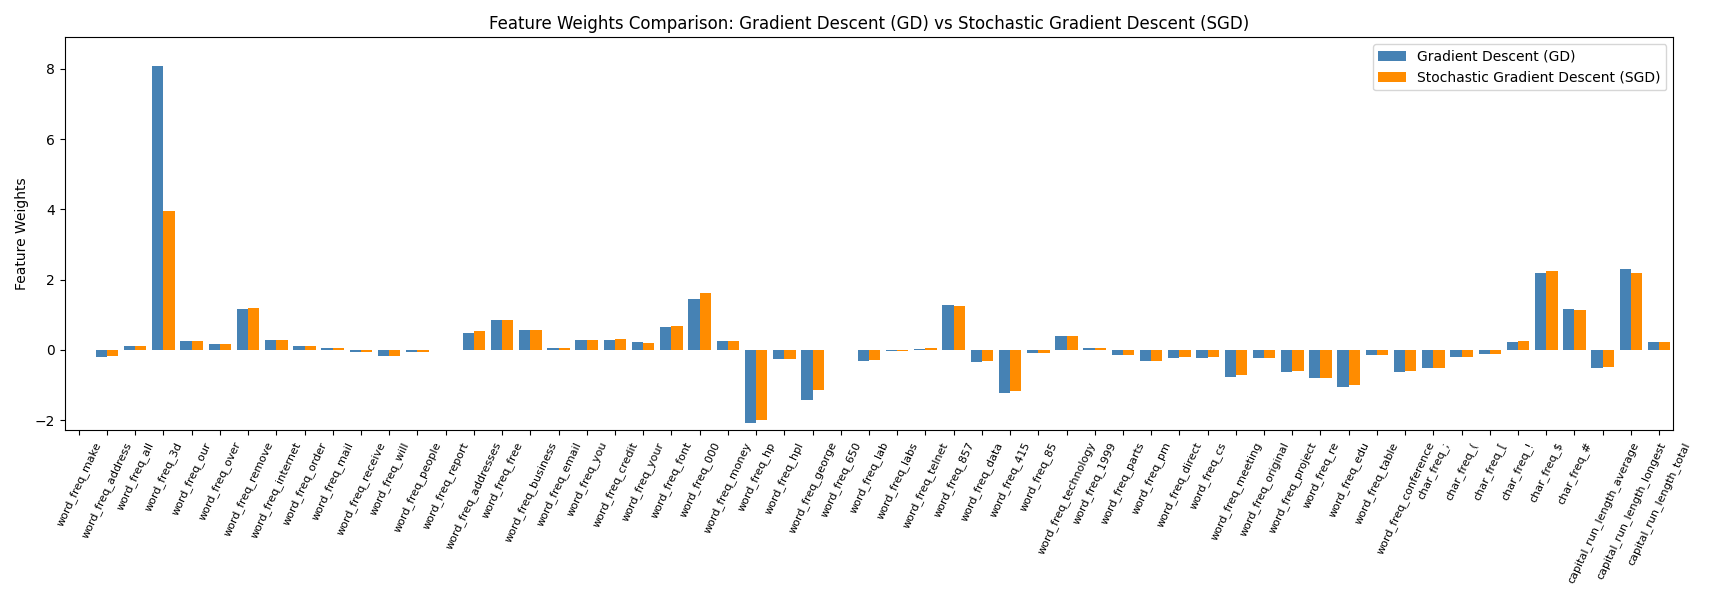

In [118]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(len(features) * 0.3, 6))
x_positions = np.arange(len(features))

# Plot weights with consistent color and labels
ax.bar(x_positions - 0.2, wz_gd, width=0.4, color='steelblue', label="Gradient Descent (GD)")
ax.bar(x_positions + 0.2, wz_sgd, width=0.4, color='darkorange', label="Stochastic Gradient Descent (SGD)")

# Set feature names on the x-axis as ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(features, rotation=65, fontsize=8)
ax.set_xlim(-0.5, len(features) - 0.5)

# Add labels and title
ax.set_ylabel("Feature Weights")
plt.title("Feature Weights Comparison: Gradient Descent (GD) vs Stochastic Gradient Descent (SGD)")

# Set y-axis range to include both negative and positive weight values
min_weight = min(np.min(wz_gd), np.min(wz_sgd))
max_weight = max(np.max(wz_gd), np.max(wz_sgd))
ax.set_ylim([min_weight * 1.1, max_weight * 1.1])  

# Add a legend and tighten layout
ax.legend()
plt.tight_layout()

# Display the plot
plt.show()


# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [ ]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    # YOUR CODE HERE

In [ ]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

In [ ]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE

In [ ]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

In [ ]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE

In [ ]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

## 4b Effect of Prior

In [ ]:
# YOUR CODE HERE

## 4c Composition of Weight Vector

In [ ]:
# YOUR CODE HERE

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [ ]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)